# Phoneme to sentence conversion

## Data Preparation

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
root = '../input/darpa-timit-acousticphonetic-continuous-speech/data'

In [3]:
data = pd.read_csv("../input/darpa-timit-acousticphonetic-continuous-speech/train_data.csv")
data.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,path_from_data_dir_windows,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
0,1.0,TRAIN,DR4,MMDM0,SI681.WAV.wav,TRAIN/DR4/MMDM0/SI681.WAV.wav,TRAIN\\DR4\\MMDM0\\SI681.WAV.wav,True,True,False,False,False
1,2.0,TRAIN,DR4,MMDM0,SI1311.PHN,TRAIN/DR4/MMDM0/SI1311.PHN,TRAIN\\DR4\\MMDM0\\SI1311.PHN,False,False,False,True,False
2,3.0,TRAIN,DR4,MMDM0,SI1311.WRD,TRAIN/DR4/MMDM0/SI1311.WRD,TRAIN\\DR4\\MMDM0\\SI1311.WRD,False,False,True,False,False
3,4.0,TRAIN,DR4,MMDM0,SX321.PHN,TRAIN/DR4/MMDM0/SX321.PHN,TRAIN\\DR4\\MMDM0\\SX321.PHN,False,False,False,True,False
4,5.0,TRAIN,DR4,MMDM0,SX321.WRD,TRAIN/DR4/MMDM0/SX321.WRD,TRAIN\\DR4\\MMDM0\\SX321.WRD,False,False,True,False,False


Selecting only DR1, DR2 and DR3 dialects.

In [4]:
txt_file = data[data['dialect_region'].isin(['DR1', 'DR2', 'DR3']) &
                 (data['is_sentence_file'] == True)]
txt_file.head()

,index,test_or_train,dialect_region,speaker_id,filename,path_from_data_dir,path_from_data_dir_windows,is_converted_audio,is_audio,is_word_file,is_phonetic_file,is_sentence_file
3403,3404.0,TRAIN,DR3,MDNS0,SX111.TXT,TRAIN/DR3/MDNS0/SX111.TXT,TRAIN\\DR3\\MDNS0\\SX111.TXT,False,False,False,False,True
3408,3409.0,TRAIN,DR3,MDNS0,SI873.TXT,TRAIN/DR3/MDNS0/SI873.TXT,TRAIN\\DR3\\MDNS0\\SI873.TXT,False,False,False,False,True
3412,3413.0,TRAIN,DR3,MDNS0,SI2271.TXT,TRAIN/DR3/MDNS0/SI2271.TXT,TRAIN\\DR3\\MDNS0\\SI2271.TXT,False,False,False,False,True
3413,3414.0,TRAIN,DR3,MDNS0,SX201.TXT,TRAIN/DR3/MDNS0/SX201.TXT,TRAIN\\DR3\\MDNS0\\SX201.TXT,False,False,False,False,True
3415,3416.0,TRAIN,DR3,MDNS0,SA1.TXT,TRAIN/DR3/MDNS0/SA1.TXT,TRAIN\\DR3\\MDNS0\\SA1.TXT,False,False,False,False,True


In [5]:
df = pd.DataFrame()
df['Dialect'] = txt_file['dialect_region']
df['Text'] = root+'/'+txt_file['path_from_data_dir']
# Modifying path_from_data_dir for Word and Phoneme files
df['Word'] = df['Text'].apply(lambda x:x[:-3]+'WRD') 
df['Phoneme'] = df['Text'].apply(lambda x:x[:-3]+'PHN')
df.reset_index(drop=True, inplace=True)

In [6]:
df

,Dialect,Text,Word,Phoneme
0,DR3,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
1,DR3,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
2,DR3,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
3,DR3,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
4,DR3,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
...,...,...,...,...
1895,DR1,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
1896,DR1,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
1897,DR1,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...
1898,DR1,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...,../input/darpa-timit-acousticphonetic-continuo...


Method below returns phonemes for each word given

In [7]:
def word_to_phoneme(word_file_path, phoneme_file_path, dialect):
    Word = list()
    with open(word_file_path) as w: # Gives list of all Words
        while True:
            word = w.readline()
            Word.append(word)
            if not word:
                break
    Phoneme = list()
    with open(phoneme_file_path) as p: # Gives list of all Phonemes 
        while True:
            phoneme = p.readline()
            Phoneme.append(phoneme)
            if not phoneme:
                break
                
    word_list = list()
    phoneme_list = list()
    dialect_list = list()
    # As each Word and Phoneme has its start and end time attached to it,
    # Mapping start and end times to get all Phonemes in a given Word.
    for i in range(len(Word)-1): 
        start_time_word = Word[i].split()[0]
        end_time_word = Word[i].split()[1]    
        vocab = list()
        for j in range(len(Phoneme)-1):
            if int(Phoneme[j].split()[0]) >= int(start_time_word):
                vocab.append(Phoneme[j].split()[2])
                if int(Phoneme[j].split()[1]) == int(end_time_word):
                    word_list.append(Word[i].split()[2])
                    phoneme_list.append(' '.join(vocab))
                    dialect_list.append(dialect)
                    #print(Word[i].split()[2],' : ',' '.join(vocab))
                    break
    return word_list, phoneme_list, dialect_list

In [8]:
from tqdm.notebook import tqdm
tqdm.pandas()

Extracting Phonemes for df

In [9]:
Vocabulary = pd.DataFrame()
for i in tqdm(range(len(df))):
    Word, Phoneme, Dialect = word_to_phoneme(df['Word'][i], df['Phoneme'][i], df['Dialect'][i])
    Vocabulary = pd.concat([Vocabulary, pd.DataFrame([Word, Phoneme, Dialect]).T])

  0%|          | 0/1900 [00:00<?, ?it/s]

In [10]:
Vocabulary.columns = ['Word', 'Phoneme', 'Dialect']
Vocabulary.reset_index(drop=True, inplace=True)
Vocabulary

,Word,Phoneme,Dialect
0,his,hh ih z,DR3
1,sudden,s ah dcl en,DR3
2,departure,dcl d ix pcl p aa r tcl ch axr,DR3
3,shocked,sh aa kcl t,DR3
4,the,dh ix,DR3
...,...,...,...
16475,platform,pcl p l ae tcl f ao m,DR1
16476,in,ax n,DR1
16477,the,ax,DR1
16478,proper,pcl p r aa pcl p ax,DR1


Subsetting to only unique words.

In [11]:
Vocabulary.nunique()

Word       3094
Phoneme    5895
Dialect       3
dtype: int64

In [12]:
Vocabulary = Vocabulary.drop_duplicates(subset='Word', keep='first')
Vocabulary = Vocabulary.drop_duplicates(subset='Phoneme', keep='first')
Vocabulary.reset_index(drop=True, inplace=True)

In [13]:
Vocabulary.nunique()

Word       3067
Phoneme    3067
Dialect       3
dtype: int64

In [14]:
Vocabulary

,Word,Phoneme,Dialect
0,his,hh ih z,DR3
1,sudden,s ah dcl en,DR3
2,departure,dcl d ix pcl p aa r tcl ch axr,DR3
3,shocked,sh aa kcl t,DR3
4,the,dh ix,DR3
...,...,...,...
3062,manufacturer,m eh n y ix f ae kcl sh er ax,DR1
3063,initiative,ix n ih sh ax-h tcl t ih v,DR1
3064,simpler,s ih m pcl p el ih,DR1
3065,terms,tcl t er m z,DR1


In [15]:
vocab_train = (Vocabulary[Vocabulary['Dialect'].isin(['DR1', 'DR2'])]).reset_index(drop=True)
vocab_test = (Vocabulary[Vocabulary['Dialect'].isin(['DR3'])]).reset_index(drop=True)
#vocab_train = pd.concat([vocab_train, vocab_test.iloc[:round(len(vocab_test)/2)]]).reset_index(drop=True)
#vocab_test = vocab_test.iloc[round(len(vocab_test)/2):].reset_index(drop=True)
#vocab_validate = vocab_test.iloc[:round(len(vocab_test)/2)].reset_index(drop=True)
#vocab_test = vocab_test.iloc[round(len(vocab_test)/2):].reset_index(drop=True)

In [16]:
vocab_train.shape, vocab_test.shape#, vocab_validate.shape

((1168, 3), (1899, 3))

In [17]:
import re

In [18]:
def sentence_to_phoneme(sentence_file_path, dialect):
    Sentence = list()
    with open(sentence_file_path) as s: # Gives list of all Words
        while True:
            Sentence = s.readline()
            Sentence = Sentence.lower().split()
            sentence_list = list()
            for i in range(2,len(Sentence)):
                word = re.sub(r'[.]', '', Sentence[i])
                phoneme = Vocabulary[Vocabulary['Word']==word]['Phoneme']
                #print(phoneme.values)
                sentence_list.append(''.join(phoneme.values))
            return ' '.join(Sentence[2:]), '  '.join(sentence_list), dialect
            if not Sentence:
                break

In [19]:
Sentence = pd.DataFrame()
for i in tqdm(range(len(df))):
    sentence, phoneme, dialect = sentence_to_phoneme(df['Text'][i], df['Dialect'][i])
    Sentence = pd.concat([Sentence, pd.DataFrame([sentence, phoneme, dialect]).T])

  0%|          | 0/1900 [00:00<?, ?it/s]

In [20]:
Sentence.columns = ['Sentence', 'Phoneme', 'Dialect']
Sentence.reset_index(drop=True, inplace=True)
Sentence

,Sentence,Phoneme,Dialect
0,his sudden departure shocked the cast.,hh ih z s ah dcl en dcl d ix pcl p aa r tcl ...,DR3
1,"be careful that you keep adequate coverage, bu...",b iy kcl k eh r f el dh eh q y ux kcl k iy...,DR3
2,add things as you find you need 'em.,q ae dcl th eh ng z ix zh y ux f ay n dcl ...,DR3
3,approach your interview with statuesque compos...,q ah pcl p r ow tcl ch er ih nx axr v y uw ...,DR3
4,she had your dark suit in greasy wash water al...,sh ih hv eh dcl jh er dcl d aa r kcl k s u...,DR3
...,...,...,...
1895,which church do the smiths worship in?,w ix tcl ch tcl ch er tcl ch d ux dh ix s ...,DR1
1896,no manufacturer has taken the initiative in po...,n ow m eh n y ix f ae kcl sh er ax hh eh z ...,DR1
1897,most young rise early every morning.,m ow s tcl y ah ng r ay z er l iy eh v r i...,DR1
1898,the two artists exchanged autographs.,dh ix t ux aa r dx ix s ix kcl k s tcl ch e...,DR1


## Model Building

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [22]:
phoneme_tokenizer = Tokenizer(oov_token='<OOV>')
phoneme_tokenizer.fit_on_texts(Vocabulary['Phoneme'].values)
phoneme_index = phoneme_tokenizer.word_index
print(phoneme_index)

{'<OOV>': 1, 's': 2, 'ix': 3, 'n': 4, 'tcl': 5, 'l': 6, 'kcl': 7, 'r': 8, 'k': 9, 'iy': 10, 'dcl': 11, 't': 12, 'ih': 13, 'm': 14, 'eh': 15, 'pcl': 16, 'z': 17, 'p': 18, 'd': 19, 'ae': 20, 'ax': 21, 'axr': 22, 'aa': 23, 'ey': 24, 'dx': 25, 'f': 26, 'b': 27, 'er': 28, 'ay': 29, 'bcl': 30, 'ah': 31, 'v': 32, 'ow': 33, 'ng': 34, 'gcl': 35, 'sh': 36, 'ao': 37, 'w': 38, 'g': 39, 'q': 40, 'el': 41, 'jh': 42, 'ux': 43, 'y': 44, 'ch': 45, 'nx': 46, 'en': 47, 'aw': 48, 'th': 49, 'uw': 50, 'hv': 51, 'hh': 52, 'epi': 53, 'dh': 54, 'uh': 55, 'oy': 56, 'h': 57, 'zh': 58, 'em': 59, 'eng': 60, 'pau': 61}


In [23]:
phoneme_length = len(phoneme_tokenizer.word_index) + 1
phoneme_length

62

In [24]:
train_sequences = phoneme_tokenizer.texts_to_sequences(vocab_train['Phoneme'].values)
test_sequences = phoneme_tokenizer.texts_to_sequences(vocab_test['Phoneme'].values)
#validate_sequences = phoneme_tokenizer.texts_to_sequences(vocab_validate['Phoneme'].values)
longest_phoneme = len(max(train_sequences, key=len))

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [26]:
X_train = pad_sequences(train_sequences, maxlen=longest_phoneme, padding='post')
X_test = pad_sequences(test_sequences, maxlen=longest_phoneme, padding='post')
#X_val = pad_sequences(validate_sequences, maxlen=longest_phoneme, padding='post')
print('Word : ', vocab_train['Word'][0])
print('Padded : ', X_train[0])
print('Phoneme : ', vocab_train['Phoneme'][0])

Word :  ugly
Padded :  [40 31 35 39  6 10  0  0  0  0  0  0  0  0  0  0  0]
Phoneme :  q ah gcl g l iy


In [27]:
y_train = vocab_train['Word'] 
y_test = vocab_test['Word']
#y_val = vocab_validate['Word']

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le = LabelEncoder()
le.fit(Vocabulary['Word'].values)

y_train = le.transform(y_train)
y_test = le.transform(y_test)
#y_val = le.transform(y_val)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding

In [31]:
embedding_dim = 10

model = Sequential()
model.add(Embedding(phoneme_length, embedding_dim, input_length=longest_phoneme))
model.add(Bidirectional(LSTM(50)))#, return_sequences=True)))
#model.add(Bidirectional(LSTM(50)))
model.add(Dense(512, activation='relu'))
model.add(Dense(len(Vocabulary['Word'].unique()), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

2022-10-22 07:29:10.786398: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=2)

In [33]:
history = model.fit(X_train, y_train, epochs=100, callbacks=[callback])#, validation_data=(X_val, y_val))

2022-10-22 07:29:11.444919: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
37/37 [==============================] - 5s 35ms/step - loss: 8.0326
Epoch 2/100
37/37 [==============================] - 1s 35ms/step - loss: 7.9751
Epoch 3/100
37/37 [==============================] - 1s 35ms/step - loss: 7.6099
Epoch 4/100
37/37 [==============================] - 1s 36ms/step - loss: 7.3286
Epoch 5/100
37/37 [==============================] - 1s 33ms/step - loss: 7.2275
Epoch 6/100
37/37 [==============================] - 1s 33ms/step - loss: 7.1914
Epoch 7/100
37/37 [==============================] - 1s 34ms/step - loss: 7.1678
Epoch 8/100
37/37 [==============================] - 1s 35ms/step - loss: 7.1512
Epoch 9/100
37/37 [==============================] - 1s 35ms/step - loss: 7.1431
Epoch 10/100
37/37 [==============================] - 1s 34ms/step - loss: 7.1357
Epoch 11/100
37/37 [==============================] - 1s 33ms/step - loss: 7.1301
Epoch 12/100
37/37 [==============================] - 1s 34ms/step - loss: 7.1252
Epoch 13/100
37/37 [=====

## Predicting

In [34]:
def predict_sentence(test_sentences):
    predicted_sentence = list()
    words = test_sentences.split('  ')
    for i in range(len(words)):
        word = phoneme_tokenizer.texts_to_sequences([words[i]])
        word = pad_sequences(word, maxlen=longest_phoneme, padding='post')
        pred = model.predict(word)
        pred = np.argmax(pred,axis=1)
        word = le.classes_[pred[0]]
        predicted_sentence.append(word)
    return ' '.join(predicted_sentence)

In [35]:
subset = Sentence[Sentence['Dialect']=='DR3'].reset_index(drop=True)
predicted_sentence = list()
actual_sentence = list()
for i in tqdm(range(len(subset))):
    predicted_sentence.append(predict_sentence(subset['Phoneme'][i]))
    actual_sentence.append(re.sub(r'[.,!]', '', subset['Sentence'][i]))
Prediction = pd.DataFrame([actual_sentence, predicted_sentence]).T
Prediction.columns = ['Actual', 'Prediction']

  0%|          | 0/760 [00:00<?, ?it/s]

In [36]:
Prediction

,Actual,Prediction
0,his sudden departure shocked the cast,beer sides response show fawn boost
1,be careful that you keep adequate coverage but...,leaf ear deny yeah emperor assignment wife kno...
2,add things as you find you need 'em,messy letter law yeah fields yeah knives eaten
3,approach your interview with statuesque composure,uplift beer average finds traits company's
4,she had your dark suit in greasy wash water al...,meat hood beer title he'll ride count among wa...
...,...,...
755,she had your dark suit in greasy wash water al...,meat hood beer title he'll ride count among wa...
756,they did not know who they were or know their ...,ride view knocked wife we've ride earth beer w...
757,don't ask me to carry an oily rag like that,timers answer sheriff stirrin crown thou rose ...
758,would you allow acts of violence?,served yeah law branch words wife


## Evaluating based on distance

In [37]:
from gensim.models import Word2Vec

In [38]:
vocab = [Vocabulary["Word"].to_list()]
w2v = Word2Vec(vocab, min_count=0, vector_size = 32)

In [39]:
from scipy.spatial.distance import euclidean

In [40]:
def distance(sent1,sent2):
    distance = 0
    for i in range(len(sent1.split())):
        word1 = sent1.split()[i]
        word2 = sent2.split()[i]
        try:
            x1 = w2v.wv.get_vector(word1)
            x2 = w2v.wv.get_vector(word2)
        except:
            continue
        distance += round(euclidean(x1,x2), 2)
    return distance

In [41]:
Prediction['Distance'] = Prediction.progress_apply(lambda x: distance(x['Actual'], x['Prediction']), axis=1)

  0%|          | 0/760 [00:00<?, ?it/s]

In [42]:
Prediction['Distance'].describe()

count    760.000000
mean       1.216408
std        0.369458
min        0.430000
25%        0.910000
50%        1.180000
75%        1.480000
max        2.620000
Name: Distance, dtype: float64

In [43]:
Prediction[Prediction['Distance']>1]

,Actual,Prediction,Distance
1,be careful that you keep adequate coverage but...,leaf ear deny yeah emperor assignment wife kno...,1.98
2,add things as you find you need 'em,messy letter law yeah fields yeah knives eaten,1.15
4,she had your dark suit in greasy wash water al...,meat hood beer title he'll ride count among wa...,1.61
5,don't ask me to carry an oily rag like that,timers answer sheriff stirrin crown thou rose ...,1.44
6,flaxseed poultices and mustard plasters still ...,assignment opinions wife absurdly past standby...,1.48
...,...,...,...
749,in the long run it pays to buy quality clothing,ride fawn lower wife doctors pay stirrin wife ...,1.28
752,then again there's always that lovely old past...,wife wife air marvel deny beckons meat accordi...,1.67
755,she had your dark suit in greasy wash water al...,meat hood beer title he'll ride count among wa...,1.61
756,they did not know who they were or know their ...,ride view knocked wife we've ride earth beer w...,1.39


In [44]:
hue = list()
for i in range(len(Prediction)):
    if Prediction['Distance'][i]<=1:
        hue.append('<=1') 
    elif 1<Prediction['Distance'][i]<=1.5:
        hue.append('1<=1.5')
    else:
        hue.append('1.5<')
Prediction['hue'] = hue

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Distance')

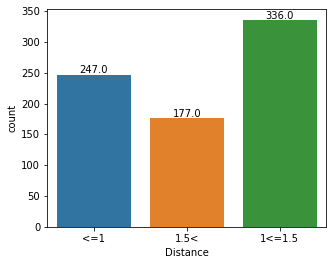

In [47]:
plt.figure(figsize=(5,4))
ax = sns.countplot(Prediction['hue'])#, order = Prediction['hue'].value_counts().index)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+2))
plt.xlabel('Distance')